In [1]:
#EE7204 - Computer Vision and Image Processing
#EG/2019/3775 - Weerawardhane W.A.S.V.
#Take Home Assignment 1

In [2]:
!pip install opencv-python

In [3]:
#1. To reduce the number of intensity levels in an image from 256 to 2, in integer powers of
#2.The desired number of intensity levels needs to be a variable input to your program.

import cv2
import numpy as np
import matplotlib.pyplot as plt

def reduce_intensity_levels(image, levels):
    levels_ratio = 256 // levels
    return (image // levels_ratio) * levels_ratio

In [4]:
# Function to perform spatial average of image pixels
def spatial_average(image, kernel_size):
    return cv2.blur(image, (kernel_size, kernel_size))

In [5]:
# Function to rotate an image by given angle
def rotate_image(image, angle):
    rows, cols = image.shape[:2]
    M = cv2.getRotationMatrix2D((cols/2, rows/2), angle, 1)
    return cv2.warpAffine(image, M, (cols, rows))

In [6]:
# Function to reduce image spatial resolution by averaging pixels in blocks
def reduce_resolution(image, block_size):
    result = np.zeros_like(image)
    for y in range(0, image.shape[0], block_size):
        for x in range(0, image.shape[1], block_size):
            block = image[y:y+block_size, x:x+block_size]
            avg_value = np.mean(block)
            result[y:y+block_size, x:x+block_size] = avg_value
    return result

In [7]:
# Upload an image file
from google.colab import files
uploaded = files.upload()

Saving wp3614507-star-wars-4k-wallpapers.jpg to wp3614507-star-wars-4k-wallpapers (2).jpg


In [13]:
# Read the uploaded image
file_name = next(iter(uploaded))
image = cv2.imread(file_name, cv2.IMREAD_GRAYSCALE)


# Reduce intensity levels
levels = int(input("Enter desired number of intensity levels: "))
reduced_image = reduce_intensity_levels(image, levels)

Enter desired number of intensity levels: 16


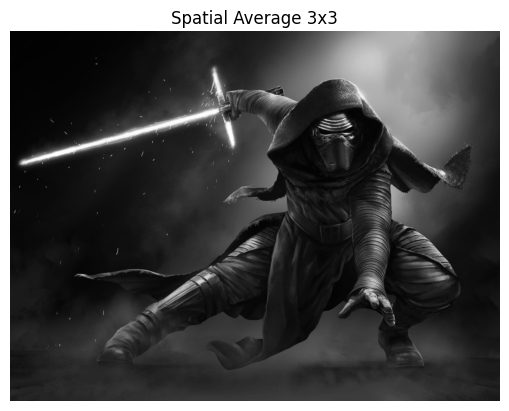

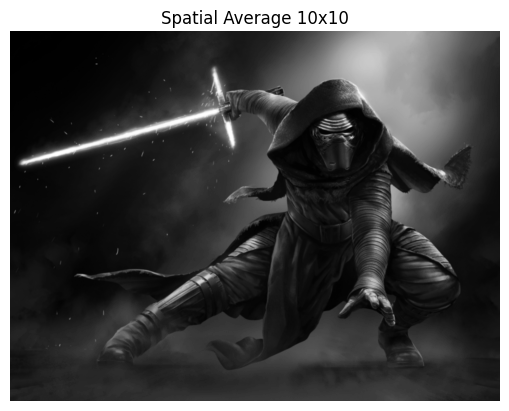

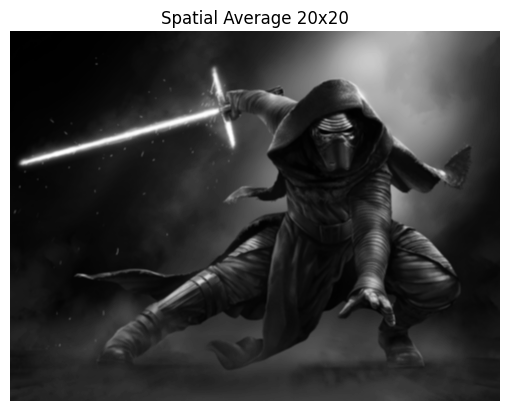

In [14]:
# Perform spatial averaging
kernel_sizes = [3, 10, 20]
for size in kernel_sizes:
    averaged_image = spatial_average(image, size)
    plt.imshow(averaged_image, cmap='gray')
    plt.title(f'Spatial Average {size}x{size}')
    plt.axis('off')
    plt.show()

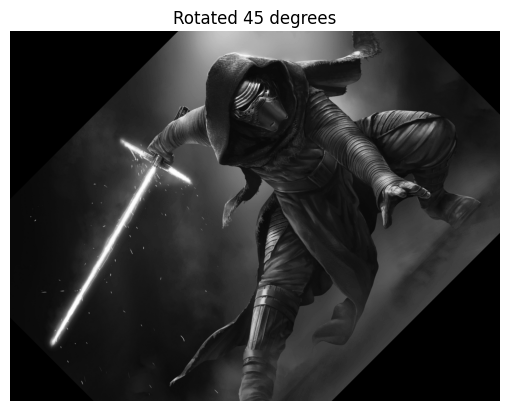

In [15]:
# Rotate image
rotated_45 = rotate_image(image, 45)
rotated_90 = rotate_image(image, 90)
plt.imshow(rotated_45, cmap='gray')
plt.title('Rotated 45 degrees')
plt.axis('off')
plt.show()

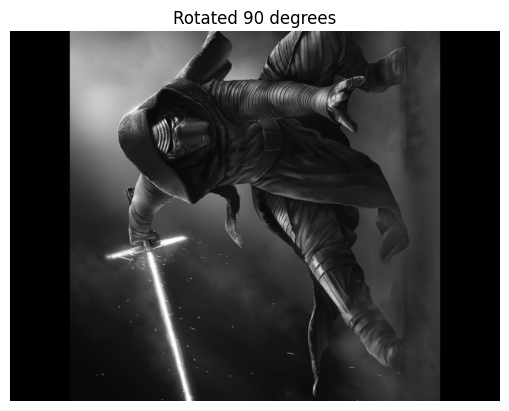

In [16]:
plt.imshow(rotated_90, cmap='gray')
plt.title('Rotated 90 degrees')
plt.axis('off')
plt.show()

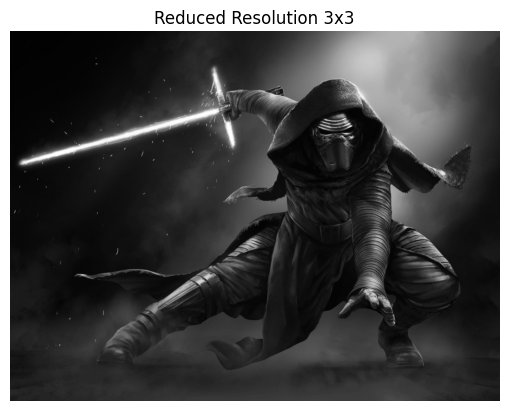

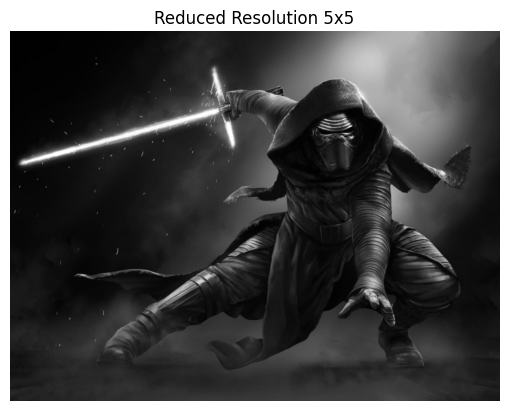

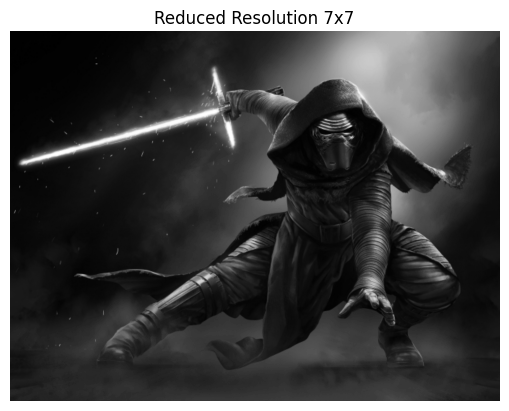

In [17]:
# Reduce image spatial resolution
block_sizes = [3, 5, 7]
for size in block_sizes:
    reduced_res_image = reduce_resolution(image, size)
    plt.imshow(reduced_res_image, cmap='gray')
    plt.title(f'Reduced Resolution {size}x{size}')
    plt.axis('off')
    plt.show()